# Datasets preparation

This notebook showcases how the datasets were prepared for the task of binary classification.
A total of 9 datasets is featured including 3 small (<= 10 features) and 6 large datasets (> 10 features).
The details about each of them can be found in `DATASETS.md`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 

In [2]:
base_dir = ""  # directory to keep the datasets in, links to download can be found in DATASETS.md

In [3]:
def check_missing(data, verbose=True):
    missing_percentage = data.isnull().sum() * 100 / len(data)
    if verbose:
        print(missing_percentage)
    else:
        return missing_percentage

In [4]:
def test_logistic_regression(X: pd.DataFrame, y: pd.Series, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

### Wine Color Classification

In [5]:
red_wine_dataset = pd.read_csv(f'{base_dir}/wine_quality/winequality-red.csv', sep=';')
white_wine_dataset = pd.read_csv(f'{base_dir}/wine_quality/winequality-white.csv', sep=';')

red_wine_dataset['wine_type'] = 'red'
white_wine_dataset['wine_type'] = 'white'
data_in = pd.concat([red_wine_dataset, white_wine_dataset], ignore_index=True)

print(data_in.head())
print(len(data_in))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9.8        5   

In [6]:
check_missing(data_in)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
wine_type               0.0
dtype: float64


In [7]:
data = data_in.copy()
data['target'] = data['wine_type'].map({'red': 0, 'white': 1})
data = data.drop(['wine_type'], axis=1)

In [8]:
cols = data.columns.difference(['target'])
corr_matrix = data[data.columns.difference(['target'])].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)
print(len(to_drop))
clean_data = data.copy()
clean_data = clean_data.drop(to_drop, axis=1)

[]
0


In [9]:
y = clean_data['target']
X = clean_data.drop('target', axis=1)
test_logistic_regression(X, y, test_size=0.2)

0.9730769230769231
[[317  24]
 [ 11 948]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       341
           1       0.98      0.99      0.98       959

    accuracy                           0.97      1300
   macro avg       0.97      0.96      0.96      1300
weighted avg       0.97      0.97      0.97      1300


C:\Users\jkraszewski\PycharmProjects\advanced-ml-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
clean_data.to_csv("datasets/wine_color_classification.csv", index=False)

### Mushroom Classification

In [11]:
data_in = fetch_ucirepo(id=73).data
data_in = pd.concat([data_in.features, data_in.targets], axis=1)
print(data_in.head())
print(len(data_in))

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o

In [12]:
missing = check_missing(data_in, False)
print(missing[missing > 0])
filled_data = data_in.copy()
filled_data['stalk-root'] = filled_data['stalk-root'].fillna('missing')
missing = check_missing(filled_data, False)
print(missing[missing > 0])

stalk-root    30.526834
dtype: float64
Series([], dtype: float64)


In [13]:
encoded_data = filled_data.copy()
for col in encoded_data.columns.difference(['poisonous']):
    dummies = pd.get_dummies(encoded_data[col], dtype=int, prefix=col)
    encoded_data = pd.concat([encoded_data, dummies], axis=1).drop(col, axis=1)
encoded_data['target'] = encoded_data['poisonous'].map({'e': 0, 'p': 1})
encoded_data = encoded_data.drop('poisonous', axis=1)
for col in encoded_data.columns:
    print(col, np.unique(encoded_data[col]))

bruises_f [0 1]
bruises_t [0 1]
cap-color_b [0 1]
cap-color_c [0 1]
cap-color_e [0 1]
cap-color_g [0 1]
cap-color_n [0 1]
cap-color_p [0 1]
cap-color_r [0 1]
cap-color_u [0 1]
cap-color_w [0 1]
cap-color_y [0 1]
cap-shape_b [0 1]
cap-shape_c [0 1]
cap-shape_f [0 1]
cap-shape_k [0 1]
cap-shape_s [0 1]
cap-shape_x [0 1]
cap-surface_f [0 1]
cap-surface_g [0 1]
cap-surface_s [0 1]
cap-surface_y [0 1]
gill-attachment_a [0 1]
gill-attachment_f [0 1]
gill-color_b [0 1]
gill-color_e [0 1]
gill-color_g [0 1]
gill-color_h [0 1]
gill-color_k [0 1]
gill-color_n [0 1]
gill-color_o [0 1]
gill-color_p [0 1]
gill-color_r [0 1]
gill-color_u [0 1]
gill-color_w [0 1]
gill-color_y [0 1]
gill-size_b [0 1]
gill-size_n [0 1]
gill-spacing_c [0 1]
gill-spacing_w [0 1]
habitat_d [0 1]
habitat_g [0 1]
habitat_l [0 1]
habitat_m [0 1]
habitat_p [0 1]
habitat_u [0 1]
habitat_w [0 1]
odor_a [0 1]
odor_c [0 1]
odor_f [0 1]
odor_l [0 1]
odor_m [0 1]
odor_n [0 1]
odor_p [0 1]
odor_s [0 1]
odor_y [0 1]
population_a [0 1

In [14]:
cols = encoded_data.columns.difference(['target'])
corr_matrix = encoded_data[encoded_data.columns.difference(['target'])].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)
print(len(to_drop))
clean_data = encoded_data.copy()
clean_data = clean_data.drop(to_drop, axis=1)

['bruises_t', 'gill-attachment_f', 'gill-size_n', 'gill-spacing_w', 'ring-number_n', 'ring-number_t', 'ring-type_n', 'stalk-color-above-ring_c', 'stalk-color-above-ring_o', 'stalk-color-below-ring_c', 'stalk-color-below-ring_o', 'stalk-shape_t', 'veil-color_w', 'veil-color_y']
14


In [15]:
y = clean_data['target']
X = clean_data.drop('target', axis=1)
test_logistic_regression(X, y, test_size=0.2)

1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


In [16]:
clean_data.to_csv("datasets/mushroom_classification.csv", index=False)

### Estimation of obesity levels based on eating habits and physical condition

In [17]:
data_in = fetch_ucirepo(id=544).data
data_in = pd.concat([data_in.features, data_in.targets], axis=1)
print(data_in.head())
print(len(data_in))
print(data_in['NObeyesdad'].unique())
print(data_in['CAEC'].unique())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [18]:
missing = check_missing(data_in)

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64


In [19]:
data = data_in.copy()
gender_dummies = pd.get_dummies(data['Gender'], dtype=int, prefix='Gender')
data = pd.concat([data, gender_dummies], axis=1).drop('Gender', axis=1)
main_transport_dummies = pd.get_dummies(data['MTRANS'], dtype=int, prefix='MTRANS')
data = pd.concat([data, main_transport_dummies], axis=1).drop('MTRANS', axis=1)
caec_dummies = pd.get_dummies(data['CAEC'], dtype=int, prefix='CAEC')
data = pd.concat([data, caec_dummies], axis=1).drop('CAEC', axis=1)
calc_dummies = pd.get_dummies(data['CALC'], dtype=int, prefix='CALC')
data = pd.concat([data, calc_dummies], axis=1).drop('CALC', axis=1)
data.replace('no', 0, inplace=True)
data.replace('yes', 1, inplace=True)
data['target'] = data['NObeyesdad'].map({
    'Insufficient_Weight': 0,
    'Normal_Weight': 0,
    'Overweight_Level_I': 0,
    'Overweight_Level_II': 0,
    'Obesity_Type_I': 1,
    'Obesity_Type_II': 1,
    'Obesity_Type_III': 1
})
check_missing(data)
data['target'] = data['target'].astype(int)
data = data.drop('NObeyesdad', axis=1)
print(data.head())
print(len(data))
# for col in data.columns:
#     print(col, np.unique(data[col]))

Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
NObeyesdad                        0.0
Gender_Female                     0.0
Gender_Male                       0.0
MTRANS_Automobile                 0.0
MTRANS_Bike                       0.0
MTRANS_Motorbike                  0.0
MTRANS_Public_Transportation      0.0
MTRANS_Walking                    0.0
CAEC_Always                       0.0
CAEC_Frequently                   0.0
CAEC_Sometimes                    0.0
CAEC_no                           0.0
CALC_Always                       0.0
CALC_Frequently                   0.0
CALC_Sometim

In [20]:
cols = data.columns.difference(['target'])
corr_matrix = data[data.columns.difference(['target'])].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
# print Gender_Male correlations
print(upper['Gender_Male'])
print(to_drop)
print(len(to_drop))
clean_data = data.copy()
clean_data = clean_data.drop(to_drop, axis=1)

Age                               0.048394
CAEC_Always                       0.019296
CAEC_Frequently                   0.123224
CAEC_Sometimes                    0.071790
CAEC_no                           0.062930
CALC_Always                       0.021514
CALC_Frequently                   0.034848
CALC_Sometimes                    0.037694
CALC_no                           0.024163
CH2O                              0.107930
FAF                               0.189607
FAVC                              0.064934
FCVC                              0.274505
Gender_Female                     1.000000
Gender_Male                            NaN
Height                                 NaN
MTRANS_Automobile                      NaN
MTRANS_Bike                            NaN
MTRANS_Motorbike                       NaN
MTRANS_Public_Transportation           NaN
MTRANS_Walking                         NaN
NCP                                    NaN
SCC                                    NaN
SMOKE      

In [21]:
y = clean_data['target']
X = clean_data.drop('target', axis=1)
test_logistic_regression(X, y, test_size=0.8)

0.9585553582001184
[[903  29]
 [ 41 716]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       932
           1       0.96      0.95      0.95       757

    accuracy                           0.96      1689
   macro avg       0.96      0.96      0.96      1689
weighted avg       0.96      0.96      0.96      1689


C:\Users\jkraszewski\PycharmProjects\advanced-ml-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
clean_data.to_csv("datasets/obesity_levels.csv", index=False)

### Taiwanese Bankruptcy Prediction

In [23]:
path = f"{base_dir}/taiwanese bankruptcy prediction/data.csv"
data_in = pd.read_csv(path)
print(len(data_in))
print(data_in.head())
print(data_in['Bankrupt?'].unique())
print(len(data_in[data_in['Bankrupt?'] == 0]), len(data_in[data_in['Bankrupt?'] == 1]))

6819
   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0

In [24]:
missing = check_missing(data_in, False)
missing_cols = missing[missing > 0].index
print(missing_cols)

Index([], dtype='object')


In [25]:
data = data_in.copy()
data['target'] = data['Bankrupt?']
data = data.drop('Bankrupt?', axis=1)

In [26]:
cols = data.columns.difference(['target'])
corr_matrix = data[data.columns.difference(['target'])].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)
print(len(to_drop))
clean_data = data.drop(to_drop, axis=1)

[' Continuous interest rate (after tax)', ' Current Liabilities/Equity', ' Current Liability to Equity', ' Current Liability to Liability', ' Debt ratio %', ' Equity to Long-term Liability', ' Liability to Equity', " Net Income to Stockholder's Equity", ' Net Value Per Share (B)', ' Net Value Per Share (C)', ' Net worth/Assets', ' Operating Funds to Liability', ' Operating Gross Margin', ' Operating Profit Per Share (Yuan ¥)', ' Operating Profit Rate', ' Operating profit/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)', ' Persistent EPS in the Last Four Seasons', ' Pre-tax net Interest Rate', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Realized Sales Gross Margin', ' Regular Net Profit Growth Rate', ' Working capitcal Turnover Rate']
25


In [27]:
y = clean_data['target']
X = clean_data.drop('target', axis=1)
test_logistic_regression(X, y, test_size=0.5)

0.9633431085043989
[[3283   17]
 [ 108    2]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3300
           1       0.11      0.02      0.03       110

    accuracy                           0.96      3410
   macro avg       0.54      0.51      0.51      3410
weighted avg       0.94      0.96      0.95      3410


C:\Users\jkraszewski\PycharmProjects\advanced-ml-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
clean_data.to_csv("datasets/taiwanese_bankruptcy_prediction.csv", index=False)

### Room Occupancy Estimation

In [29]:
path = f"{base_dir}/room occupancy estimation/Occupancy_Estimation.csv"
data_in = pd.read_csv(path)
print(len(data_in))
print(data_in.head())
print(data_in['Room_Occupancy_Count'].unique())
print(len(data_in[data_in['Room_Occupancy_Count'] == 0]), len(data_in[data_in['Room_Occupancy_Count'] == 1]))
print(len(data_in[data_in['Room_Occupancy_Count'] == 2]), len(data_in[data_in['Room_Occupancy_Count'] == 3]))


10129
         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0 

In [30]:
check_missing(data_in)

Date                    0.0
Time                    0.0
S1_Temp                 0.0
S2_Temp                 0.0
S3_Temp                 0.0
S4_Temp                 0.0
S1_Light                0.0
S2_Light                0.0
S3_Light                0.0
S4_Light                0.0
S1_Sound                0.0
S2_Sound                0.0
S3_Sound                0.0
S4_Sound                0.0
S5_CO2                  0.0
S5_CO2_Slope            0.0
S6_PIR                  0.0
S7_PIR                  0.0
Room_Occupancy_Count    0.0
dtype: float64


In [31]:
data = data_in.copy()
data.drop(['Date', 'Time'], axis=1, inplace=True)
data['target'] = data['Room_Occupancy_Count'].map({0: 0, 1: 0, 2: 1, 3: 1})
data = data.drop('Room_Occupancy_Count', axis=1)

In [32]:
cols = data.columns.difference(['target'])
print(len(cols))
corr_matrix = data[data.columns.difference(['target'])].corr().abs()
# sns.heatmap(corr_matrix, annot=True)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)
print(len(to_drop))
data.drop(to_drop, axis=1, inplace=True)

16
['S2_Light', 'S3_Light', 'S3_Temp', 'S4_Temp', 'S5_CO2']
5


In [33]:
y = data['target']
X = data.drop('target', axis=1)
test_logistic_regression(X, y, test_size=0.8)

0.9692744323790721
[[6859  100]
 [ 149  996]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6959
           1       0.91      0.87      0.89      1145

    accuracy                           0.97      8104
   macro avg       0.94      0.93      0.94      8104
weighted avg       0.97      0.97      0.97      8104


C:\Users\jkraszewski\PycharmProjects\advanced-ml-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
data.to_csv("datasets/room_occupancy_estimation.csv", index=False)

### Mice Protein Expression

In [35]:
path = f"{base_dir}/mice protein expression/Data_Cortex_Nuclear.xls"
data_in = pd.read_excel(path)
print(len(data_in))
print(data_in.head())
print(data_in.Genotype.unique())
print(len(data_in[data_in['Genotype'] == 'Control']))
print(len(data_in[data_in['Genotype'] == 'Ts65Dn']))

1080
  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memanti

In [36]:
missing = check_missing(data_in, verbose=False)
missing_cols = missing[missing > 0].index
print(len(missing[missing > 0]))
# print(data_in[data_in['DYRK1A_N'].isnull()][missing_cols])
clean_data = data_in.dropna(subset=['DYRK1A_N'])
new_missing = check_missing(clean_data, verbose=False)
print(len(new_missing[new_missing > 0]))
clean_data = clean_data.drop(['H3MeK4_N', 'EGR1_N', 'H3AcK18_N', 'BCL2_N', 'BAD_N'], axis=1)
new_missing = check_missing(clean_data, verbose=False)
print(new_missing[new_missing > 0])
def mean_comparison(data, column):
    print(column)
    print('mean', data[column].mean())
    print('mean control', data[data['Genotype'] == 'Control'][column].mean())
    print('mean Ts65Dn', data[data['Genotype'] == 'Ts65Dn'][column].mean())
remaining = ['ELK_N', 'MEK_N', 'Bcatenin_N', 'pCFOS_N']
for col in remaining:
    mean_comparison(clean_data, col)

for col in remaining:
    clean_data[col] = clean_data[col].fillna(clean_data[col].mean())
new_missing = check_missing(clean_data, False)
print(new_missing[new_missing > 0])

49
9
ELK_N         1.392758
MEK_N         0.371402
Bcatenin_N    1.392758
pCFOS_N       6.963788
dtype: float64
ELK_N
mean 1.173399772153484
mean control 1.194868624789189
mean Ts65Dn 1.1498983654220907
MEK_N
mean 0.27278898873345764
mean control 0.27034535320671377
mean Ts65Dn 0.2755169921025641
Bcatenin_N
mean 2.1465499764802263
mean control 2.143583148151351
mean Ts65Dn 2.1497976879644973
pCFOS_N
mean 0.1311142802654691
mean control 0.13292271553518517
mean Ts65Dn 0.12900052475541124
Series([], dtype: float64)


In [37]:
data = clean_data.copy()
data = data.drop(['MouseID', 'Treatment','Behavior', 'class'], axis=1)
data['target'] = data['Genotype'].map({'Control': 0, 'Ts65Dn': 1})
data = data.drop('Genotype', axis=1)
print(data.head())

   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...   PSD95_N    SNCA_N  Ubiquitin_N  \
0   2.373744  0.232224  1.750936  ...  2.014875  0.108234     1.044979   
1   2.292150  0.226972  1.596377  ...  2.004605  0.109749     1.009883   
2   2.283337  0.230247  1.561316  ...  2.016831  0.108196     0.996848   
3   2.152301  0.207004  1.595086  ...  1.957233  0.119883     0.990225   
4   2.134014  0.192158  1.504230  ...  2.009109  0.119524     0.997775   

   pGSK3B_Tyr216_N     SHH_N     pS6_N   pCFOS_N     SYP_N    CaNA_N  target  
0         0.831557  0.188

In [38]:
cols = data.columns.difference(['target'])
print(len(cols))
corr_matrix = data[data.columns.difference(['target'])].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)
print(len(to_drop))
# data.drop(to_drop, axis=1, inplace=True)

72
['DYRK1A_N', 'ELK_N', 'ERK_N', 'ITSN1_N', 'NR1_N', 'NR2A_N', 'NR2B_N', 'RSK_N', 'TIAM1_N', 'TRKA_N', 'Tau_N', 'pBRAF_N', 'pELK_N', 'pERK_N', 'pMEK_N', 'pMTOR_N', 'pNR1_N', 'pNR2B_N', 'pPKCAB_N', 'pS6_N']
20


In [39]:
y = data['target']
X = data.drop('target', axis=1)
test_logistic_regression(X, y, test_size=0.4)

0.925754060324826
[[228   9]
 [ 23 171]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       237
           1       0.95      0.88      0.91       194

    accuracy                           0.93       431
   macro avg       0.93      0.92      0.92       431
weighted avg       0.93      0.93      0.93       431


C:\Users\jkraszewski\PycharmProjects\advanced-ml-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
data.to_csv("datasets/mice_protein_expression.csv", index=False)

### Fertility

In [41]:
path = f"{base_dir}/fertility/fertility_Diagnosis.txt"
data_in = pd.read_csv(path, header=None)
data_in.rename(
    columns={
        0: 'Season',
        1: 'Age',
        2: 'Childish diseases',
        3: 'Accident or serious trauma',
        4: 'Surgical intervention',
        5: 'High fevers in the last year',
        6: 'Frequency of alcohol consumption',
        7: 'Smoking habit',
        8: 'Number of hours spent sitting per day',
        9: 'Output'
    },
    inplace=True
)
data_in.Season = data_in.Season.map({-1: 'winter', -0.33: 'spring', 0.33: 'summer', 1: 'fall'})
print(len(data_in))
print(data_in.head())

print('N', len(data_in[data_in['Output'] == 'N']))
print('O', len(data_in[data_in['Output'] == 'O']))

100
   Season   Age  Childish diseases  Accident or serious trauma  \
0  spring  0.69                  0                           1   
1  spring  0.94                  1                           0   
2  spring  0.50                  1                           0   
3  spring  0.75                  0                           1   
4  spring  0.67                  1                           1   

   Surgical intervention  High fevers in the last year  \
0                      1                             0   
1                      1                             0   
2                      0                             0   
3                      1                             0   
4                      0                             0   

   Frequency of alcohol consumption  Smoking habit  \
0                               0.8              0   
1                               0.8              1   
2                               1.0             -1   
3                               1.

In [42]:
check_missing(data_in)
for col in data_in.columns:
    print(col, np.unique(data_in[col]))

Season                                   0.0
Age                                      0.0
Childish diseases                        0.0
Accident or serious trauma               0.0
Surgical intervention                    0.0
High fevers in the last year             0.0
Frequency of alcohol consumption         0.0
Smoking habit                            0.0
Number of hours spent sitting per day    0.0
Output                                   0.0
dtype: float64
Season ['fall' 'spring' 'summer' 'winter']
Age [0.5  0.53 0.56 0.58 0.61 0.64 0.67 0.69 0.72 0.75 0.78 0.81 0.83 0.86
 0.89 0.92 0.94 1.  ]
Childish diseases [0 1]
Accident or serious trauma [0 1]
Surgical intervention [0 1]
High fevers in the last year [-1  0  1]
Frequency of alcohol consumption [0.2 0.4 0.6 0.8 1. ]
Smoking habit [-1  0  1]
Number of hours spent sitting per day [0.06 0.13 0.19 0.25 0.31 0.38 0.44 0.47 0.5  0.56 0.63 0.75 0.88 1.  ]
Output ['N' 'O']


In [43]:
data = data_in.copy()
gender_dummies = pd.get_dummies(data['Season'], dtype=int)
data = pd.concat([data, gender_dummies], axis=1).drop('Season', axis=1)
data['target'] = data['Output'].map({'N': 0, 'O': 1})
data = data.drop('Output', axis=1)
print(data.head())

    Age  Childish diseases  Accident or serious trauma  Surgical intervention  \
0  0.69                  0                           1                      1   
1  0.94                  1                           0                      1   
2  0.50                  1                           0                      0   
3  0.75                  0                           1                      1   
4  0.67                  1                           1                      0   

   High fevers in the last year  Frequency of alcohol consumption  \
0                             0                               0.8   
1                             0                               0.8   
2                             0                               1.0   
3                             0                               1.0   
4                             0                               0.8   

   Smoking habit  Number of hours spent sitting per day  fall  spring  summer  \
0              0 

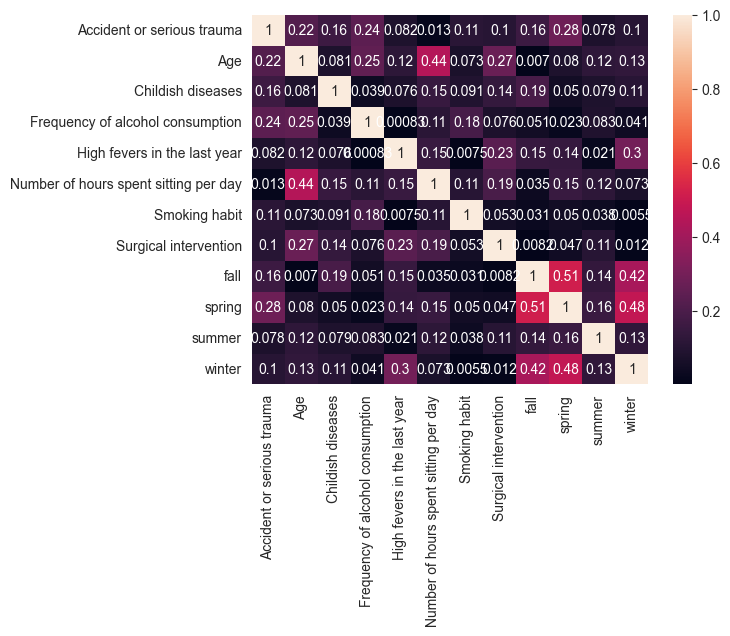

In [44]:
cols = data.columns.difference(['target'])
corr_matrix = data[data.columns.difference(['target'])].corr().abs()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [45]:
y = data['target']
X = data.drop('target', axis=1)
test_logistic_regression(X, y, test_size=0.7)

0.8857142857142857
[[62  0]
 [ 8  0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        62
           1       0.00      0.00      0.00         8

    accuracy                           0.89        70
   macro avg       0.44      0.50      0.47        70
weighted avg       0.78      0.89      0.83        70


C:\Users\jkraszewski\PycharmProjects\advanced-ml-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jkraszewski\PycharmProjects\advanced-ml-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jkraszewski\PycharmProjects\advanced-ml-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [46]:
data.to_csv("datasets/fertility.csv", index=False)

### Ajwa or Medjool

In [47]:
path = f"{base_dir}/ajwa or medjool/ajwa+or+medjool/AjwaOrMejdool.csv"
data_in = pd.read_csv(path, sep=';')
print(len(data_in))

20


In [48]:
check_missing(data_in)
check_color = data_in['Color'] + data_in['Class (Ajwa or Medjool)']
print(np.unique(check_color))

Date Length (cm)           0.0
Date Diameter (cm)         0.0
Date Weight (g)            0.0
Pit Length (cm)            0.0
Calories (Kcal)            0.0
Color                      0.0
Class (Ajwa or Medjool)    0.0
dtype: float64
['BlackAjwa' 'BrownMedjool']


In [49]:
data = data_in.copy()
print(np.unique(data['Class (Ajwa or Medjool)']))
data['target'] = data['Class (Ajwa or Medjool)'].map({'Ajwa': 0, 'Medjool': 1})
data = data.drop('Color', axis=1).drop('Class (Ajwa or Medjool)', axis=1)

['Ajwa' 'Medjool']


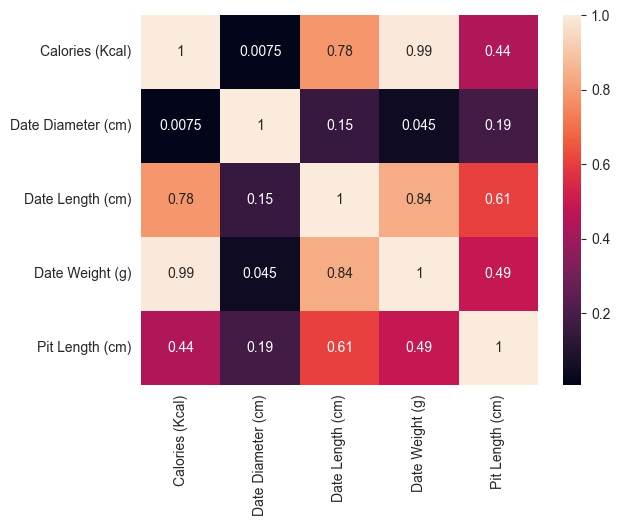

In [50]:
cols = data.columns.difference(['target'])
corr_matrix = data[data.columns.difference(['target'])].corr().abs()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [51]:
data.drop(['Calories (Kcal)', 'Date Length (cm)'], axis=1, inplace=True)
print(data.columns)

Index(['Date Diameter (cm)', 'Date Weight (g)', 'Pit Length (cm)', 'target'], dtype='object')


In [52]:
y = data['target']
X = data.drop('target', axis=1)
test_logistic_regression(X, y, test_size=0.6)

0.9166666666666666
[[6 0]
 [1 5]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12


In [53]:
data.to_csv("datasets/ajwa_or_medjool.csv", index=False)

### NHANES survey age prediction

In [54]:
path = f"{base_dir}/nhanes survey age prediction/NHANES_age_prediction.csv"
data_in = pd.read_csv(path)
data = data_in.copy()
print(len(data))

2278


In [55]:
check_missing(data_in)

SEQN         0.0
age_group    0.0
RIDAGEYR     0.0
RIAGENDR     0.0
PAQ605       0.0
BMXBMI       0.0
LBXGLU       0.0
DIQ010       0.0
LBXGLT       0.0
LBXIN        0.0
dtype: float64


In [56]:
print(np.unique(data['age_group']))
data['target'] = data_in['age_group'].map({'Adult': 0, 'Senior': 1})
data = data.drop('SEQN', axis=1).drop('age_group', axis=1)

['Adult' 'Senior']


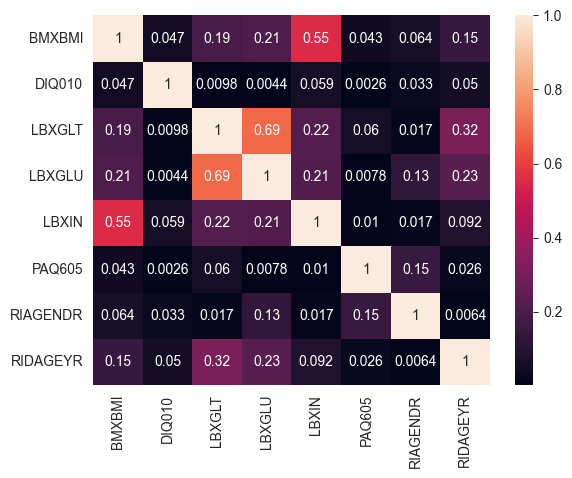

In [57]:
cols = data.columns.difference(['target'])
corr_matrix = data[data.columns.difference(['target'])].corr().abs()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [58]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print(to_drop)
data.drop(to_drop, axis=1, inplace=True)

['LBXGLU', 'LBXIN']


In [59]:
y = data['target']
X = data.drop('target', axis=1)
test_logistic_regression(X, y)

1.0
[[382   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456


C:\Users\jkraszewski\PycharmProjects\advanced-ml-project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
data.to_csv("datasets/nhanes_survey_age_prediction.csv", index=False)